<h1>HW6</h1>

# Question
### (Inverse Transform Sampling) Complete the following exercises 

### 1.1

Create a function to sample from a Gaussian distribution with mean $\mu$ and standard deviation $\sigma$:

* Function name: sample_gaussian

* Input: $\mu$, $\sigma$, n

* Output: a n-element vector of random sample from Gaussian~N($\mu$, $\sigma$)

* You are `not allowed` to use the Distributions.jl package or any existing sampler
* You are `allowed` to use SpecialFunctions.jl for special functions and rand for random number generation


An [example](https://stephens999.github.io/fiveMinuteStats/inverse_transform_sampling.html) of inverse transform sampling

In [3]:
import Pkg
Pkg.add(["SpecialFunctions", "Plots" , "Distributions"])

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.8/Project.toml`
  No Changes to `~/.julia/environments/v1.8/Manifest.toml`


In [4]:
import SpecialFunctions
import Plots
import Distributions as di
using SpecialFunctions, Plots

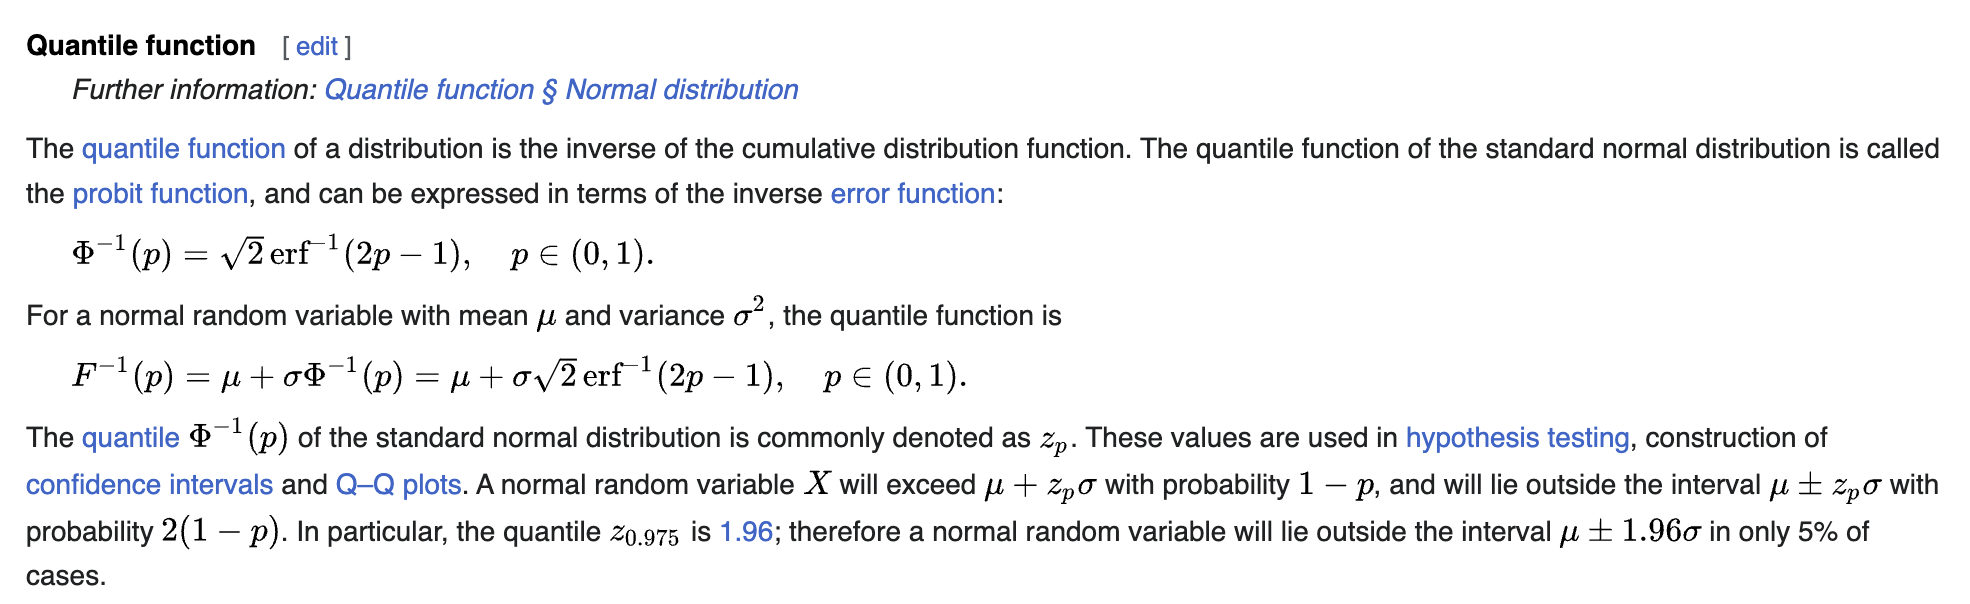

In [10]:
function sample_gaussian(μ,σ,n)
    value = []
    for j in 1:n
    push!(value,μ + σ* sqrt(2)*erfinv.(2*rand()-1))
end
    return value
end

sample_gaussian (generic function with 1 method)

In [6]:
sample_gaussian(-1,2,10000)

10000-element Vector{Any}:
 -0.983791499543274
 -3.2172432323936926
  2.540796103131382
  0.5347792664267434
  0.4161421522036963
 -0.1492884286067182
 -1.8069112146576747
 -2.256420626798292
 -0.19080294117787766
  0.11027989552542938
 -5.01573568444999
  0.789033455456303
 -1.7561014284245067
  ⋮
  0.6358322483255756
 -1.9731292625922938
  1.4603529835840021
 -1.6765490367851328
 -3.598973075055679
 -2.779654129746319
 -6.770473343916323
  0.0011001322605044273
 -0.6413667164381204
 -3.4676396424685247
 -2.6357863059079305
 -0.5083908014590115

### 1.2


1. Use the sampler above to draw 10000 samples from a Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2)
2. Plot the histogram of the 10000 samples 
3. Use the Distributions.jl package to obtain the pdf of the same Gaussian distribution~N($\mu$ = -1, $\sigma$ = 2) using x = -8:0.001:6
4. Plot the pdf on top of the histogram from step 2

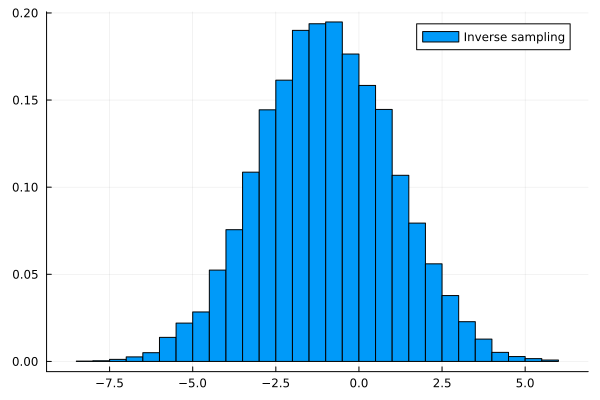

In [11]:
gauss = sample_gaussian(-1,2,10000)
histogram(gauss, normalize = true, label="Inverse sampling")

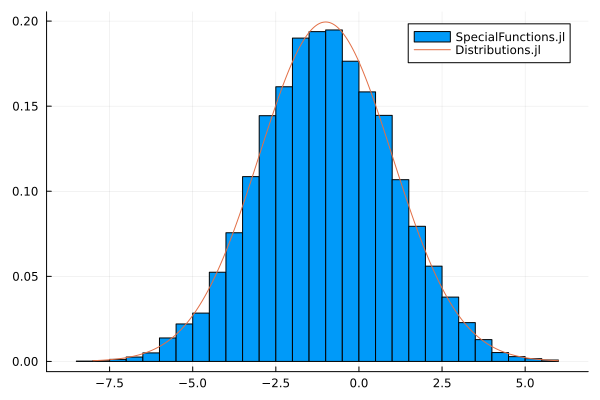

In [12]:
x = -8:0.001:6
histogram(gauss, normalize = true, label="SpecialFunctions.jl")
norm = di.Normal(-1,2)
plot!(x,di.pdf.(norm,x), label = "Distributions.jl")